In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


In [5]:
data=pd.read_csv("/content/Dry_Bean_Classification.csv")

In [6]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
data.shape

(13611, 17)

In [8]:
data.dtypes

,0
Area,int64
Perimeter,float64
MajorAxisLength,float64
MinorAxisLength,float64
AspectRation,float64
Eccentricity,float64
ConvexArea,int64
EquivDiameter,float64
Extent,float64
Solidity,float64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [10]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


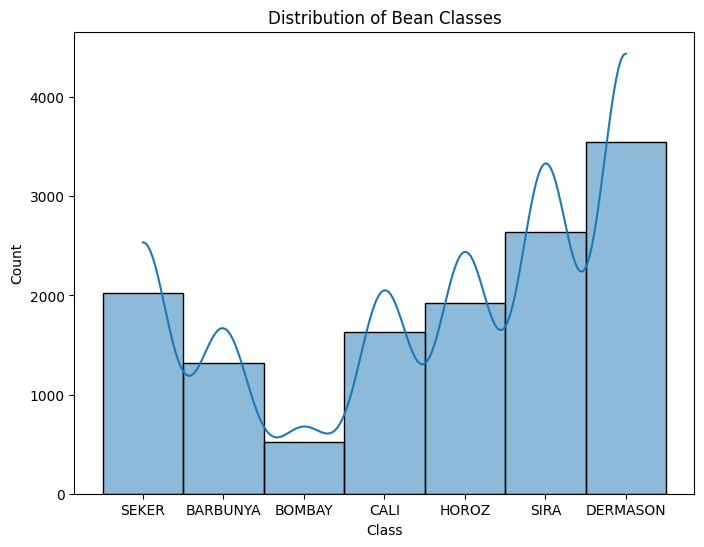

In [11]:
# Distribution of Classes
plt.figure(figsize=(8, 6))
sns.histplot(data=data,x="Class",kde=True,palette='coolwarm')
plt.title('Distribution of Bean Classes')
plt.show()

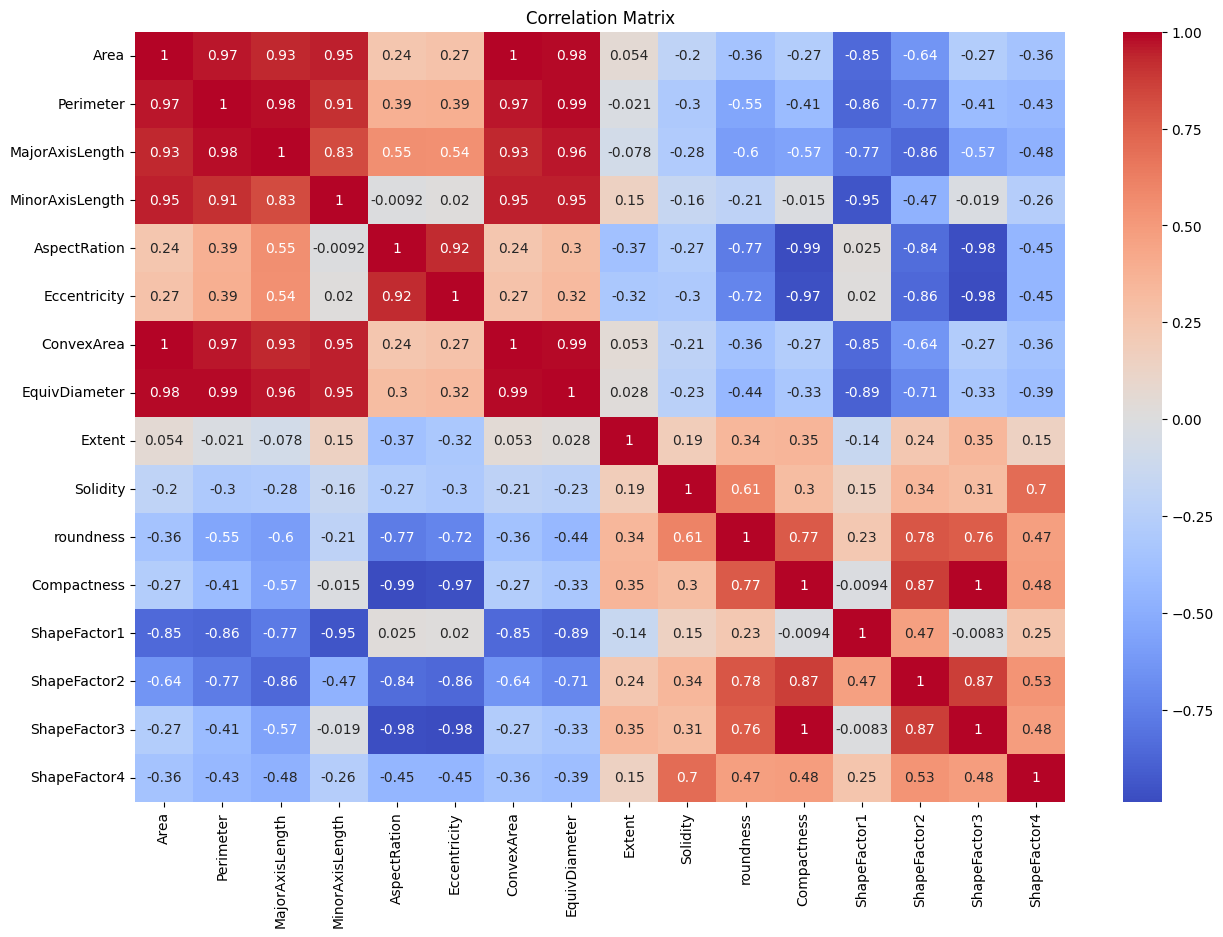

In [12]:
#check feature corelation
feature_corr=data.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(data=feature_corr,annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
#data cleaning and preprocessing

In [14]:
data.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [15]:
#cheking the skewness
data.skew(numeric_only=True)

,0
Area,2.952931
Perimeter,1.626124
MajorAxisLength,1.357815
MinorAxisLength,2.238211
AspectRation,0.582573
Eccentricity,-1.062824
ConvexArea,2.941821
EquivDiameter,1.948958
Extent,-0.895348
Solidity,-2.550093


In [16]:
#Treat the skewness
# Apply log transformation to positively skewed features
highly_pos_skewed_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']
for feature in highly_pos_skewed_features:
    data[feature] = np.log(data[feature])


In [17]:
# treating with power transformation for features with negative skewness
neg_skewed_features = ['Solidity', 'ShapeFactor4']
pt = PowerTransformer(method='yeo-johnson')
data[neg_skewed_features] = pt.fit_transform(data[neg_skewed_features])

In [18]:
data.skew(numeric_only=True)

,0
Area,1.071374
Perimeter,0.842886
MajorAxisLength,0.629485
MinorAxisLength,1.308713
AspectRation,0.582573
Eccentricity,-1.062824
ConvexArea,1.066049
EquivDiameter,1.071374
Extent,-0.895348
Solidity,-0.133298


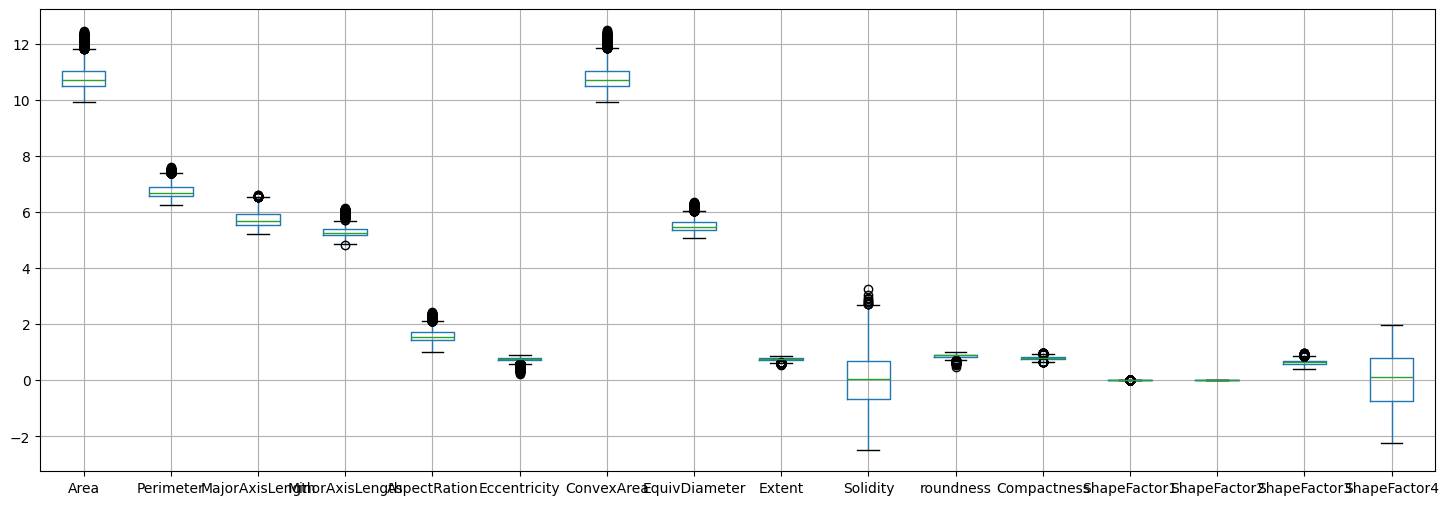

In [19]:
#cheking the outliers
plt.figure(figsize=(18, 6))
data.boxplot()
plt.show()

In [20]:
#Treating the outlier

def ot(data,col):
  Q3=data[col].quantile(0.75)
  Q1=data[col].quantile(0.25)
  IQR=Q3-Q1
  UB=Q3+1.5*IQR
  LB=Q1-1.5*IQR
  upper_ot=data[col]>UB
  lower_ot=data[col]<LB
  data.loc[upper_ot,col]=data[col].median()
  data.loc[lower_ot,col]=data[col].median()
  return data

In [21]:
for i in data.select_dtypes(include=['int64','float64']):
  ot(data,i)

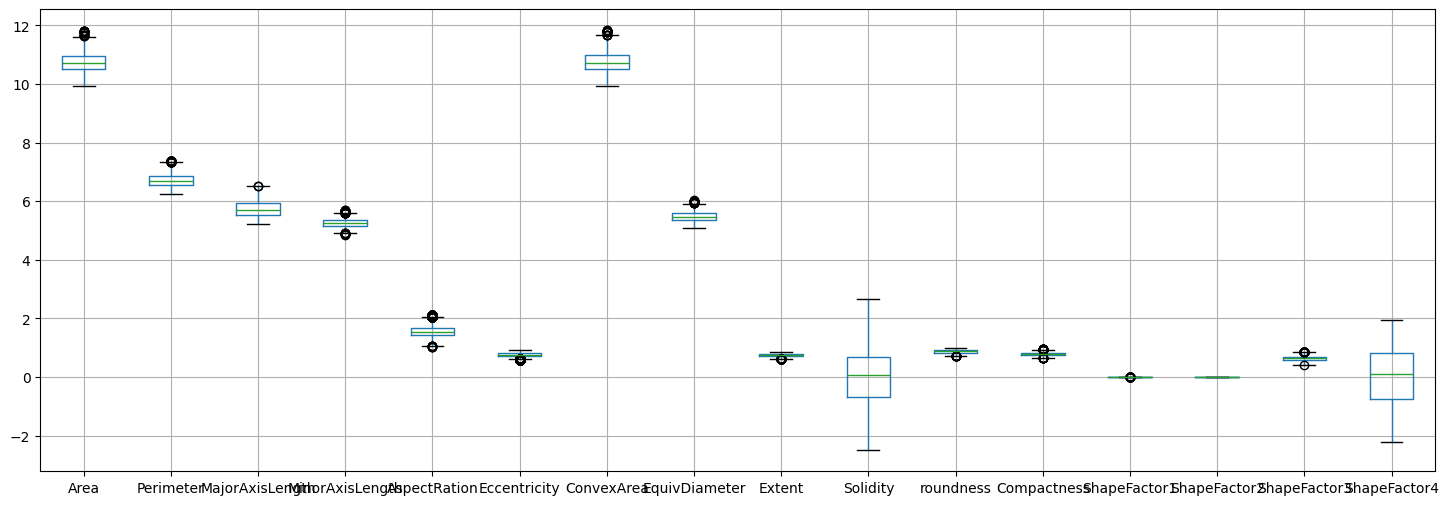

In [22]:
plt.figure(figsize=(18, 6))
data.boxplot()
plt.show()

In [23]:
##concert the categorical data into numerical data

In [24]:
LE=LabelEncoder()
data['Class']=LE.fit_transform(data["Class"])

In [25]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,10.253968,6.413936,5.338394,5.158416,1.197191,0.764441,10.265175,5.247766,0.763923,0.249347,0.958027,0.913358,0.007332,0.003147,0.834222,1.287825,5
1,10.265836,6.458366,5.300938,5.208034,1.097356,0.764441,10.280965,5.253700,0.783968,-0.816459,0.887034,0.801277,0.006979,0.003564,0.642044,1.113296,5
2,10.288069,6.436327,5.360476,5.170093,1.209713,0.764441,10.298566,5.264817,0.778113,0.505185,0.947849,0.908774,0.007244,0.003048,0.825871,1.502822,5
3,10.309219,6.470620,5.349761,5.206841,1.153638,0.764441,10.332799,5.275392,0.782681,-1.912356,0.903936,0.928329,0.007017,0.003215,0.861794,-0.624704,5
4,10.313608,6.429936,5.307514,5.248493,1.060798,0.764441,10.322757,5.277586,0.773098,1.058074,0.984877,0.801277,0.006697,0.003665,0.642044,1.568033,5


In [26]:
#convert the data into train test split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(data.drop("Class",axis=1),data['Class'],test_size=0.2,random_state=42)

In [28]:
#to predict the class we are RandomForestClassifier

In [29]:
RFC=RandomForestClassifier()

In [30]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
model_pred=RFC.predict(x_test)

In [32]:
#cheking the accuracy of model
accuracy_score(y_test,model_pred)

0.9221446933529196

In [33]:
RCF_Score=f1_score(y_test,model_pred,average='weighted')

In [34]:
RCF_Score

0.9222603284398542

In [35]:
print(classification_report(y_test,model_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       261
           1       1.00      1.00      1.00       117
           2       0.91      0.94      0.93       317
           3       0.90      0.92      0.91       671
           4       0.97      0.95      0.96       408
           5       0.96      0.94      0.95       413
           6       0.87      0.88      0.88       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [36]:
# model pred by using LogisticRegression

In [37]:
LR=LogisticRegression()

In [38]:
LR.fit(x_train,y_train)

LogisticRegression()

In [39]:
model_pred=LR.predict(x_test)

In [40]:
accuracy_score(y_test,model_pred)

0.744399559309585

In [41]:
LR_Score=f1_score(y_test,model_pred,average='weighted')

In [42]:
LR_Score

0.7459779244355622

In [43]:
print(classification_report(y_test,model_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       261
           1       0.98      0.88      0.93       117
           2       0.58      0.76      0.66       317
           3       0.72      0.75      0.73       671
           4       0.86      0.80      0.83       408
           5       0.95      0.92      0.93       413
           6       0.57      0.52      0.55       536

    accuracy                           0.74      2723
   macro avg       0.79      0.77      0.77      2723
weighted avg       0.75      0.74      0.75      2723



In [44]:
# model pred by using KNeighborsClassifier

In [45]:
KNC=KNeighborsClassifier()

In [46]:
KNC.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
model_pred=KNC.predict(x_test)

In [48]:
accuracy_score(y_test,model_pred)

0.9004774146162321

In [49]:
KNC_score=f1_score(y_test,model_pred,average='weighted')

In [50]:
KNC_score

0.9010876250271131

In [51]:
print(classification_report(y_test,model_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       261
           1       1.00      0.95      0.97       117
           2       0.88      0.93      0.90       317
           3       0.89      0.90      0.89       671
           4       0.97      0.91      0.94       408
           5       0.96      0.92      0.94       413
           6       0.82      0.86      0.84       536

    accuracy                           0.90      2723
   macro avg       0.92      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



In [52]:
#cross validation of all model

In [53]:
KNC_Validation=cross_val_score(KNC,x_train,y_train,cv=5).mean()
RFC_Validation=cross_val_score(RFC,x_train,y_train,cv=5).mean()
LR_Validation=cross_val_score(LR,x_train,y_train,cv=5).mean()

In [54]:
print("Cross validation Score Summary:")
print("Logistic Regression Accuracy: ",LR_Validation*100)
print("Random Forest Accuracy: ",RFC_Validation*100)
print("KNN Accuracy: ",KNC_Validation*100)

Cross validation Score Summary:
Logistic Regression Accuracy:  72.97045706575084
Random Forest Accuracy:  92.22075855224057
KNN Accuracy:  90.07168608454784


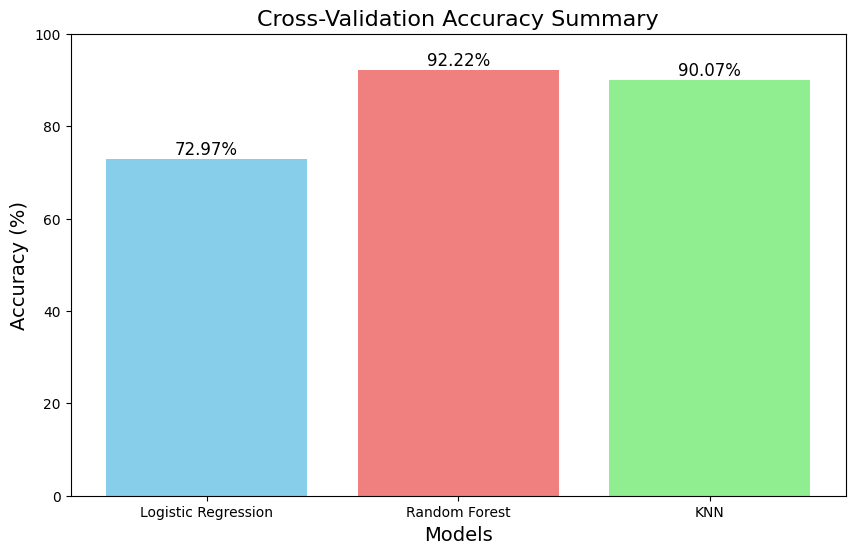

In [55]:
models = ['Logistic Regression', 'Random Forest', 'KNN']
accuracies = [LR_Validation * 100, RFC_Validation * 100, KNC_Validation * 100]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Cross-Validation Accuracy Summary', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0, 100)  # Set y-axis limit to 100%

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, str(round(v, 2)) + '%', ha='center', fontsize=12)

plt.show()


Based on the cross-validation summary, the **Random Forest** model achieved the highest accuracy at **92.34%**, indicating it performs best for this dataset. The **KNN** model also showed strong performance with **90.07%** accuracy, while **Logistic Regression** had the lowest accuracy at **72.97%**, suggesting it might not capture the complexity of the data as effectively as the other models.